In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data/BRAZIL_CITIES.csv', sep=';')
data.head(2)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0


In [3]:
data.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       ' GVA_TOTAL ', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'P

In [4]:
# Categorias:

populacao = [
    'CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS', 'IBGE_RES_POP_ESTR', 'IBGE_DU', 
    'IBGE_DU_URBAN', 'IBGE_DU_RURAL', 'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
    'IBGE_15-59', 'IBGE_60+', 'ESTIMATED_POP', 'Cars', 'Motorcycles'
]

indices_economicos = [
    'IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao', 
    'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC', ' GVA_TOTAL ', 
    'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN', 'MUN_EXPENDIT', 'Pr_Assets', 'Pu_Assets',
    'PAY_TV', 'FIXED_PHONES'
]

indices_empresariais = ['COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
    'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
    'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
    'COMP_S', 'COMP_T', 'COMP_U', 'Pr_Agencies', 'Pu_Agencies', 'Pr_Bank', 'Pu_Bank',
    'UBER', 'MAC', 'WAL-MART', 'POST_OFFICES'
]

rural = [
    'IBGE_DU_RURAL', 'IBGE_PLANTED_AREA', 'IBGE_CROPPRODUCTION$', 'Wheeled_tractor'
]

turismo = [
    'HOTELS', 'BEDS', 'REGIAO_TUR', 'CATEGORIA_TUR'
]


Divisão em categorias para facilitar o entendimento do escopo do projeto

# População

A partir da lista acima, obtemos os dados relativos à população:

In [5]:
populacao = data[[i for i in populacao]].copy()
populacao.head(5)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,ESTIMATED_POP,Cars,Motorcycles
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,438.0,517.0,3542.0,416.0,8583.0,2158.0,1246.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,207.0,260.0,351.0,2709.0,589.0,6972.0,2227.0,1142.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,650.0,894.0,1087.0,6896.0,990.0,19614.0,2838.0,1426.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,856.0,1233.0,1539.0,11979.0,2681.0,23223.0,6928.0,2953.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,5567.0,7618.0,8905.0,53516.0,5996.0,156292.0,5277.0,25661.0


In [6]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CITY               5573 non-null   object 
 1   STATE              5573 non-null   object 
 2   CAPITAL            5573 non-null   int64  
 3   IBGE_RES_POP       5565 non-null   float64
 4   IBGE_RES_POP_BRAS  5565 non-null   float64
 5   IBGE_RES_POP_ESTR  5565 non-null   float64
 6   IBGE_DU            5563 non-null   float64
 7   IBGE_DU_URBAN      5563 non-null   float64
 8   IBGE_DU_RURAL      5492 non-null   float64
 9   IBGE_POP           5565 non-null   float64
 10  IBGE_1             5565 non-null   float64
 11  IBGE_1-4           5565 non-null   float64
 12  IBGE_5-9           5565 non-null   float64
 13  IBGE_10-14         5565 non-null   float64
 14  IBGE_15-59         5565 non-null   float64
 15  IBGE_60+           5565 non-null   float64
 16  ESTIMATED_POP      5570 

A quantidade de nulos, representada abaixo, são uma pequena fração dos dados, tendo a coluna com maior número de dados faltantes

apenas 1.45% de seus valores nulos. Podemos observar também uma repetição nas porcentagens:

In [7]:
populacao.isnull().sum() * 100 / populacao.shape[0]

CITY                 0.000000
STATE                0.000000
CAPITAL              0.000000
IBGE_RES_POP         0.143549
IBGE_RES_POP_BRAS    0.143549
IBGE_RES_POP_ESTR    0.143549
IBGE_DU              0.179437
IBGE_DU_URBAN        0.179437
IBGE_DU_RURAL        1.453436
IBGE_POP             0.143549
IBGE_1               0.143549
IBGE_1-4             0.143549
IBGE_5-9             0.143549
IBGE_10-14           0.143549
IBGE_15-59           0.143549
IBGE_60+             0.143549
ESTIMATED_POP        0.053831
Cars                 0.197380
Motorcycles          0.197380
dtype: float64

Podemos observar com frequência o número de valores faltantes ser 8. Provavelmente encontraremos as mesmas cidades nestas colunas faltantes.

São cidades que não parecem ter as pesquisas "básicas" realizadas. Isso acaba se refletindo também nas que tem 10 ou mais, pois nelas devem estar incluidas estas 8.

In [8]:
populacao.isnull().sum()

CITY                  0
STATE                 0
CAPITAL               0
IBGE_RES_POP          8
IBGE_RES_POP_BRAS     8
IBGE_RES_POP_ESTR     8
IBGE_DU              10
IBGE_DU_URBAN        10
IBGE_DU_RURAL        81
IBGE_POP              8
IBGE_1                8
IBGE_1-4              8
IBGE_5-9              8
IBGE_10-14            8
IBGE_15-59            8
IBGE_60+              8
ESTIMATED_POP         3
Cars                 11
Motorcycles          11
dtype: int64

In [9]:
populacao.loc[populacao.Cars.isnull()]


,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,ESTIMATED_POP,Cars,Motorcycles
28,Açu,RN,0,53227.0,53216.0,11.0,14880.0,11063.0,3817.0,41739.0,601.0,2546.0,3312.0,3934.0,27195.0,4151.0,57644.0,NaN,NaN
208,Amparo Do Serra,MG,0,5053.0,5053.0,0.0,1467.0,766.0,701.0,2623.0,26.0,115.0,196.0,273.0,1607.0,406.0,4751.0,NaN,NaN
427,Augusto Severo,RN,0,9289.0,9289.0,0.0,2614.0,1500.0,1114.0,4991.0,60.0,288.0,443.0,461.0,3098.0,641.0,9638.0,NaN,NaN
683,Bom Jesus De Goiás,GO,0,20727.0,20727.0,0.0,6546.0,6069.0,477.0,19094.0,275.0,1258.0,1537.0,1624.0,12743.0,1657.0,24776.0,NaN,NaN
2519,Januário Cicco,RN,0,9011.0,9011.0,0.0,2469.0,936.0,1533.0,3365.0,41.0,203.0,331.0,338.0,1989.0,463.0,10087.0,NaN,NaN
2701,Lagoa Dos Patos,RS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4016,Presidente Castelo Branco,PR,0,4784.0,4784.0,0.0,1485.0,1313.0,172.0,4165.0,59.0,221.0,318.0,368.0,2726.0,473.0,5260.0,NaN,NaN
4489,Santa Terezinha,BA,0,9648.0,9648.0,0.0,2891.0,734.0,2157.0,2332.0,40.0,126.0,191.0,217.0,1419.0,339.0,NaN,NaN,NaN
4605,São Caetano,PE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4617,São Domingos,PB,0,2855.0,2855.0,0.0,829.0,302.0,527.0,980.0,6.0,54.0,79.0,81.0,573.0,187.0,3087.0,NaN,NaN


Apesar da algumas das entradas conterem valores NaN, optei por mantê-las no dataset, pois

os motivos para isso variam: algumas cidades não realizaram ou não reportaram o número de carros e motos,

algumas não possuem área rural, logo não realizam entradas no "DU_RURAL", e visando a preservação do 

máximo possível de informações, não removerei os valores, nem atribuirei valor ZERO aos NaN's, para

não distorcer as visualizações.


______

## Nomes de cidades repetidas

A título de curiosidade, vamos ver abaixo uma lista de cidades homônimas. Nenhum valor será excluído.

Obs: Ficar atento caso utilizar alguma agregação pelo nome das cidades.

In [10]:
homonimas = populacao[populacao.CITY.duplicated(keep=False)]
homonimas

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,ESTIMATED_POP,Cars,Motorcycles
46,Água Boa,MT,0,20856.0,20844.0,12.0,6437.0,5251.0,1186.0,16691.0,288.0,1047.0,1464.0,1551.0,11228.0,1113.0,25229.0,4470.0,7111.0
47,Água Boa,MG,0,15195.0,15195.0,0.0,4170.0,2015.0,2155.0,6987.0,103.0,447.0,665.0,873.0,4115.0,784.0,13600.0,1205.0,1962.0
48,Água Branca,PI,0,16451.0,16451.0,0.0,4733.0,4203.0,530.0,14525.0,204.0,933.0,1347.0,1541.0,8658.0,1842.0,17349.0,2117.0,8713.0
49,Água Branca,AL,0,19377.0,19377.0,0.0,4734.0,1361.0,3373.0,5090.0,90.0,361.0,505.0,513.0,3047.0,574.0,20162.0,957.0,2347.0
50,Água Branca,PB,0,9449.0,9449.0,0.0,2562.0,1209.0,1353.0,4059.0,57.0,266.0,397.0,450.0,2336.0,553.0,10161.0,323.0,322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,Viçosa,MG,0,72220.0,72086.0,134.0,22761.0,21311.0,1450.0,67078.0,742.0,3119.0,4403.0,5325.0,46216.0,7273.0,78286.0,22185.0,17515.0
5497,Viçosa,AL,0,25407.0,25407.0,0.0,6778.0,4989.0,1789.0,18508.0,273.0,1245.0,1666.0,2058.0,11396.0,1870.0,25773.0,1745.0,3200.0
5498,Viçosa,RN,0,1618.0,1618.0,0.0,481.0,458.0,23.0,1541.0,18.0,85.0,124.0,151.0,988.0,175.0,1712.0,133.0,261.0
5554,Wenceslau Braz,PR,0,19298.0,19283.0,15.0,6256.0,5026.0,1230.0,15386.0,225.0,870.0,1222.0,1440.0,9699.0,1930.0,19444.0,6031.0,2487.0


Quais os nomes de cidade que mais se repetem:

In [11]:
homonimas.CITY.value_counts()

São Domingos      5
Bom Jesus         5
Planalto          4
Vera Cruz         4
Santa Helena      4
                 ..
Itajá             2
Itapeva           2
Itapiranga        2
Itaporanga        2
Wenceslau Braz    2
Name: CITY, Length: 234, dtype: int64

Podemos verificar que até mesmo algumas capitais

possuem cidades com nomes compartilhados:

In [12]:
homonimas[homonimas.CAPITAL == 1]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,ESTIMATED_POP,Cars,Motorcycles
580,Belém,PA,1,1393399.0,1391623.0,1776.0,369222.0,365974.0,3248.0,1370089.0,19479.0,77895.0,103623.0,117183.0,924038.0,127871.0,1485732.0,231612.0,141727.0
642,Boa Vista,RR,1,284313.0,283523.0,790.0,76026.0,75092.0,934.0,276022.0,5245.0,20851.0,26886.0,29464.0,179366.0,14210.0,375374.0,67640.0,84374.0
971,Campo Grande,MS,1,786797.0,785017.0,1780.0,250542.0,247159.0,3383.0,765394.0,11390.0,44074.0,54942.0,63075.0,515538.0,76375.0,885711.0,302311.0,169030.0
3531,Palmas,TO,1,228332.0,228131.0,201.0,69012.0,67271.0,1741.0,216905.0,3988.0,15148.0,18368.0,19952.0,150261.0,9188.0,291855.0,77237.0,68186.0
4193,Rio Branco,AC,1,336038.0,335634.0,404.0,94393.0,87405.0,6988.0,295708.0,5023.0,21370.0,27881.0,31072.0,191460.0,18902.0,401155.0,66599.0,82414.0


_______

## Número de DU (Domestic Units - Unidades domésticas) por município

In [13]:
dus = populacao[['CITY', 'STATE' ,'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL', 'IBGE_RES_POP']]
dus

,CITY,STATE,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_RES_POP
0,Abadia De Goiás,GO,2137.0,1546.0,591.0,6876.0
1,Abadia Dos Dourados,MG,2328.0,1481.0,847.0,6704.0
2,Abadiânia,GO,4655.0,3233.0,1422.0,15757.0
3,Abaeté,MG,7694.0,6667.0,1027.0,22690.0
4,Abaetetuba,PA,31061.0,19057.0,12004.0,141100.0
...,...,...,...,...,...,...
5568,Xique-Xique,BA,11637.0,8461.0,3176.0,45536.0
5569,Zabelê,PB,673.0,489.0,184.0,2075.0
5570,Zacarias,SP,799.0,638.0,161.0,2335.0
5571,Zé Doca,MA,11886.0,7611.0,4275.0,50173.0


__________

Na célula abaixo, defino uma variável para as cidades que tem mais casas por áreas rurais e mais por áreas urbanas.

In [14]:
predominancia_dus_rurais = dus[dus['IBGE_DU_RURAL'] > dus['IBGE_DU_URBAN']]

predominancia_dus_urb = dus[dus['IBGE_DU_URBAN'] > dus['IBGE_DU_RURAL']]

In [15]:
predominancia_dus_rurais.STATE.value_counts()

RS    203
BA    182
MG    148
PI    124
SC    109
MA     99
PB     76
PA     73
PR     67
CE     59
PE     46
RN     38
AL     37
SE     26
RO     24
MT     23
TO     22
GO     21
SP     20
ES     19
AM     12
AC      7
MS      7
AP      4
RJ      4
RR      3
Name: STATE, dtype: int64

In [16]:
predominancia_dus_rurais.sort_values(by='IBGE_RES_POP', ascending=False)

,CITY,STATE,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_RES_POP
4763,São José De Ribamar,MA,42602.0,8793.0,33809.0,163045.0
932,Cametá,PA,23642.0,10990.0,12652.0,120896.0
501,Barcarena,PA,24907.0,8870.0,16037.0,99859.0
4421,Santa Luzia,MA,17496.0,6431.0,11065.0,74043.0
2125,Ibiúna,SP,21433.0,7488.0,13945.0,71217.0
...,...,...,...,...,...,...
1374,Coqueiro Baixo,RS,534.0,115.0,419.0,1528.0
2725,Lajeado Grande,SC,442.0,204.0,238.0,1490.0
5381,União Da Serra,RS,458.0,95.0,363.0,1487.0
4529,Santiago Do Sul,SC,431.0,201.0,230.0,1465.0


In [17]:
populacao.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,ESTIMATED_POP,Cars,Motorcycles
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,438.0,517.0,3542.0,416.0,8583.0,2158.0,1246.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,207.0,260.0,351.0,2709.0,589.0,6972.0,2227.0,1142.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,650.0,894.0,1087.0,6896.0,990.0,19614.0,2838.0,1426.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,856.0,1233.0,1539.0,11979.0,2681.0,23223.0,6928.0,2953.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,5567.0,7618.0,8905.0,53516.0,5996.0,156292.0,5277.0,25661.0


____________

Demonstrativos econômicos

In [18]:
data[['CITY', 'STATE',]]

,CITY,STATE
0,Abadia De Goiás,GO
1,Abadia Dos Dourados,MG
2,Abadiânia,GO
3,Abaeté,MG
4,Abaetetuba,PA
...,...,...
5568,Xique-Xique,BA
5569,Zabelê,PB
5570,Zacarias,SP
5571,Zé Doca,MA


In [19]:
data.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       ' GVA_TOTAL ', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'P

In [20]:
data[['CITY', 'REGIAO_TUR', 'CATEGORIA_TUR']]

,CITY,REGIAO_TUR,CATEGORIA_TUR
0,Abadia De Goiás,NaN,NaN
1,Abadia Dos Dourados,Caminhos Do Cerrado,D
2,Abadiânia,Região Turística Do Ouro E Cristais,C
3,Abaeté,Lago De Três Marias,D
4,Abaetetuba,Araguaia-Tocantins,D
...,...,...,...
5568,Xique-Xique,Chapada Diamantina,D
5569,Zabelê,Cariri,E
5570,Zacarias,NaN,NaN
5571,Zé Doca,NaN,NaN


<AxesSubplot:>

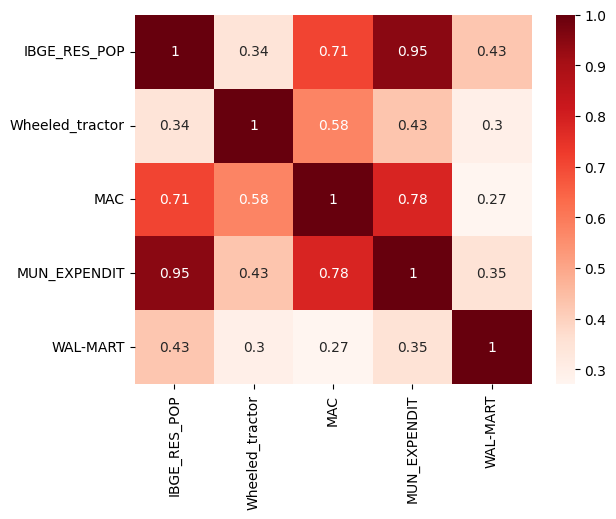

In [21]:
sns.heatmap(data[['IBGE_RES_POP','Wheeled_tractor', 'MAC', 'MUN_EXPENDIT', 'WAL-MART']].corr('spearman'), cmap='Reds', annot=True)

# Tipos de companhias

COMP_A  Agriculture, livestock, forestry, fishing and aquaculture - 2016 

COMP_B  Extractive industries 2016 

COMP_C  Industries of transformation - 2016 

COMP_D  Electricity and gas - 2016 

COMP_E  Water, sewage, waste management and decontamination activities - 2016 

COMP_F  Construction - 2016 

COMP_G  Trade; repair of motor vehicles and motorcycles - 2016 

COMP_H  Transport, storage and mail - 2016 

COMP_I  Accommodation and food - 2016 

COMP_J  Information and communication - 2016 

COMP_K  Financial, insurance and related services activities - 2016 

COMP_L  Real estate activities - 2016 

COMP_M  Professional, scientific and technical activities - 2016 

COMP_N  Administrative activities and complementary services - 2016 

COMP_O  Public administration, defense and social security - 2016 

COMP_P  Education - 2016 

COMP_Q  Human health and social services - 2016 

COMP_R  Arts, culture, sport and recreation - 2016 

COMP_S  Other service activities - 2016 

COMP_T  Domestic services - 2016 

COMP_U  International and other extraterritorial institutions - 2016 



In [22]:
companhias = data[['CITY', 'STATE','COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C',
                  'COMP_D','COMP_E', 'COMP_F', 'COMP_G', 'COMP_H',
                  'COMP_I', 'COMP_J', 'COMP_K','COMP_L', 'COMP_M',
                  'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
                  'COMP_S', 'COMP_T', 'COMP_U']].copy()

companhias.head()                  

,CITY,STATE,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,...,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U
0,Abadia De Goiás,GO,284.0,5.0,1.0,56.0,0.0,2.0,29.0,110.0,...,2.0,10.0,12.0,4.0,6.0,6.0,1.0,5.0,0.0,0.0
1,Abadia Dos Dourados,MG,476.0,6.0,6.0,30.0,1.0,2.0,34.0,190.0,...,4.0,15.0,29.0,2.0,9.0,14.0,6.0,19.0,0.0,0.0
2,Abadiânia,GO,288.0,5.0,9.0,26.0,0.0,2.0,7.0,117.0,...,0.0,7.0,15.0,3.0,11.0,5.0,1.0,8.0,0.0,0.0
3,Abaeté,MG,621.0,18.0,1.0,40.0,0.0,1.0,20.0,303.0,...,4.0,28.0,27.0,2.0,15.0,19.0,9.0,27.0,0.0,0.0
4,Abaetetuba,PA,931.0,4.0,2.0,43.0,0.0,1.0,27.0,500.0,...,1.0,22.0,16.0,2.0,155.0,33.0,15.0,56.0,0.0,0.0


In [23]:
(companhias.COMP_T == 0).value_counts() # Zeros

True     5570
False       3
Name: COMP_T, dtype: int64

In [24]:
companhias[companhias['COMP_T'] != 0] # NaN's

,CITY,STATE,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,...,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U
2701,Lagoa Dos Patos,RS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4481,Santa Teresinha,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4605,São Caetano,PE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notamos que a coluna COMP_T que diz respeito à "Domestic Services" contém apenas informações "0" ou "NaN".

Para evitar uma coluna de correlação faltosa, irei removê-la da lista de colunas aqui:

In [25]:
companhias = companhias.drop('COMP_T', axis=1)

In [26]:
companhias_corr = companhias.corr(method='')
companhias_corr

ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, '' was supplied

In [ ]:
companhias[['COMP_D', 'COMP_I']].mean()

COMP_D     0.426212
COMP_I    55.876302
dtype: float64

In [ ]:
# Fazendo uma quantidade de labels para as colunas de acordo com suas principais 
# características apenas para facilitar a leitura do gráfico. As características
# mais detalhadas podem ser vistas no começo desta seção ou nas fontes, disponíveis no read_me.

# O número de colunas foi feito de acordo com o número de campos númericos (CITY e STATE ficam de fora).

companhias_labels = ['total', 'agricola', 'extrativista', 'transformacao', 
                    'eletricidadeGas','aguaTratEsgoto', 'construcao', 
                    'oficinaMecanica', 'transpCorresp', 'acomodComida', 
                    'comunicacaoInfo','Financeiras','MercImobiliario',
                    'CientifTecnico','ServAdministrativos', 'ServPublicosAdm',
                    'Educacao', 'SaudeHumana', 'ArteCultEsporte', 'Outros',
                    'EmpInternacionais']

[]

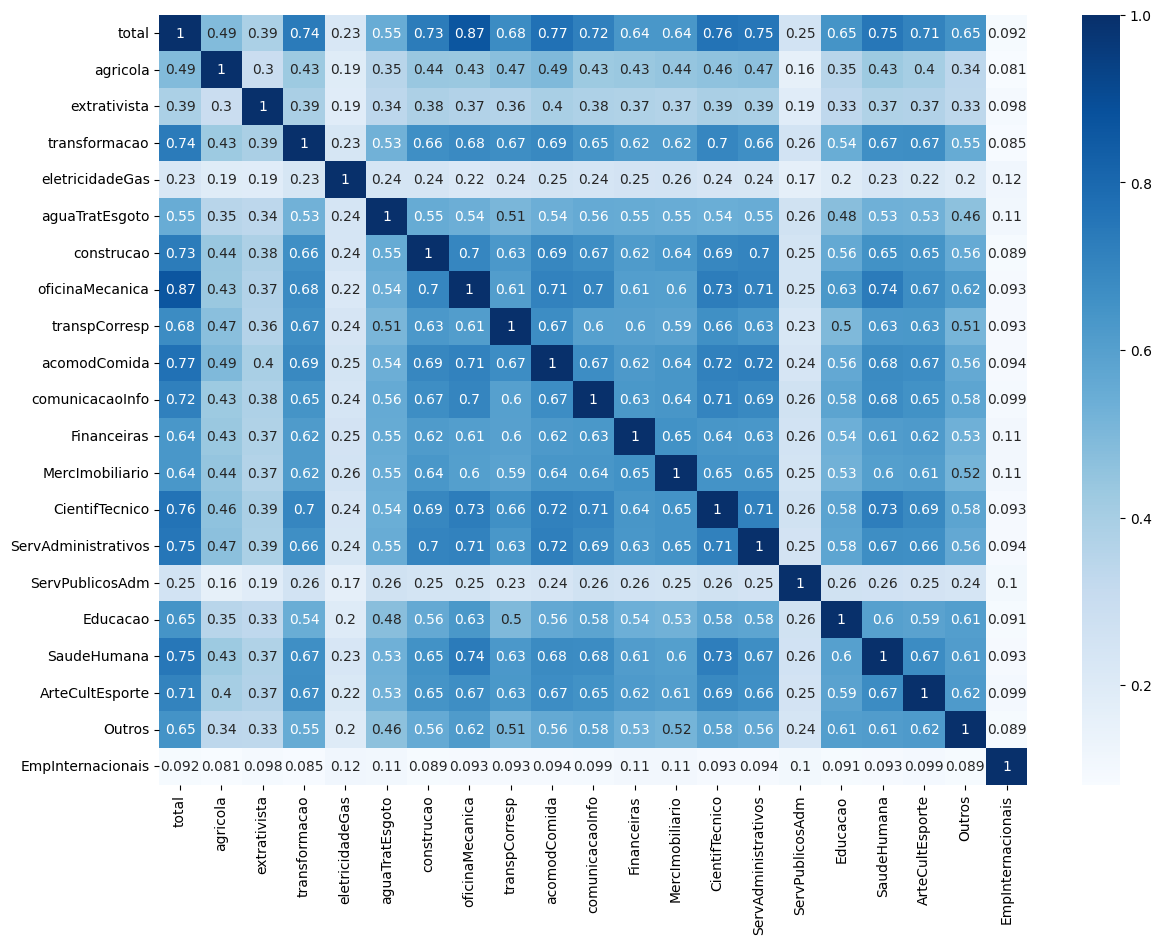

In [ ]:
plt.figure(figsize=(14,10))

sns.heatmap(data=companhias_corr, xticklabels=companhias_labels, yticklabels=companhias_labels,
            cmap='Blues', annot=True)

plt.plot()

In [ ]:
por_estado = companhias.groupby('STATE').sum()

In [ ]:
estado_t = por_estado.T

In [ ]:
estado_t.PE

COMP_TOT    124290.0
COMP_A         861.0
COMP_B         159.0
COMP_C       11124.0
COMP_D          68.0
COMP_E         302.0
COMP_F        4753.0
COMP_G       53764.0
COMP_H        3751.0
COMP_I        7666.0
COMP_J        2196.0
COMP_K        1317.0
COMP_L        1512.0
COMP_M        5675.0
COMP_N       11352.0
COMP_O         860.0
COMP_P        5750.0
COMP_Q        4106.0
COMP_R        1399.0
COMP_S        7668.0
COMP_U           7.0
Name: PE, dtype: float64

In [ ]:
companhias_por_estado = companhias.groupby('STATE').sum()

In [ ]:
companhias_por_estado.index

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='STATE')

In [ ]:
companhias_pe = companhias_por_estado.iloc[15]

COMP_A  Agriculture, livestock, forestry, fishing and aquaculture - 2016 

COMP_B  Extractive industries 2016 

COMP_C  Industries of transformation - 2016 

COMP_D  Electricity and gas - 2016 

COMP_E  Water, sewage, waste management and decontamination activities - 2016 

COMP_F  Construction - 2016 

COMP_G  Trade; repair of motor vehicles and motorcycles - 2016 

COMP_H  Transport, storage and mail - 2016 

COMP_I  Accommodation and food - 2016 

COMP_J  Information and communication - 2016 

COMP_K  Financial, insurance and related services activities - 2016 

COMP_L  Real estate activities - 2016 

COMP_M  Professional, scientific and technical activities - 2016 

COMP_N  Administrative activities and complementary services - 2016 

COMP_O  Public administration, defense and social security - 2016 

COMP_P  Education - 2016 

COMP_Q  Human health and social services - 2016 

COMP_R  Arts, culture, sport and recreation - 2016 

COMP_S  Other service activities - 2016 

COMP_T  Domestic services - 2016 

COMP_U  International and other extraterritorial institutions - 2016 

Dash: % do tipo x de companhia, por estado (maiores de cada estado)

In [ ]:
companhias_por_estado

,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,...,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_U
STATE,,,,,,,,,,,,,,,,,,,,,
AC,8342.0,82.0,18.0,565.0,4.0,25.0,372.0,3905.0,185.0,543.0,...,39.0,55.0,289.0,369.0,106.0,723.0,303.0,107.0,549.0,1.0
AL,37279.0,248.0,44.0,1897.0,6.0,114.0,1492.0,17777.0,1779.0,2601.0,...,322.0,395.0,1543.0,2433.0,293.0,1950.0,1255.0,387.0,2197.0,0.0
AM,29932.0,121.0,17.0,1943.0,17.0,117.0,1468.0,13778.0,1222.0,1629.0,...,215.0,225.0,1570.0,2089.0,243.0,1627.0,1283.0,267.0,1621.0,5.0
AP,7475.0,27.0,17.0,372.0,3.0,19.0,413.0,3850.0,154.0,443.0,...,32.0,47.0,286.0,370.0,69.0,596.0,254.0,82.0,371.0,0.0
BA,230472.0,1997.0,576.0,13447.0,102.0,506.0,9176.0,107183.0,7037.0,13648.0,...,1762.0,2603.0,10045.0,16895.0,1101.0,10922.0,11366.0,2790.0,16088.0,3.0
CE,133035.0,1045.0,227.0,12348.0,83.0,342.0,5675.0,60538.0,3094.0,7464.0,...,1192.0,1695.0,5311.0,9201.0,618.0,6081.0,4128.0,1580.0,10425.0,1.0
DF,86200.0,242.0,42.0,3269.0,22.0,130.0,4685.0,29018.0,2157.0,6788.0,...,1527.0,1670.0,6717.0,10346.0,204.0,3043.0,5363.0,1197.0,6403.0,123.0
ES,100831.0,573.0,681.0,8540.0,13.0,259.0,4912.0,39829.0,3917.0,6440.0,...,1416.0,1446.0,5959.0,9204.0,318.0,3387.0,3996.0,1343.0,6816.0,0.0
GO,164929.0,2104.0,483.0,15389.0,57.0,461.0,8046.0,73971.0,7163.0,8999.0,...,2362.0,2288.0,8103.0,11851.0,1018.0,5450.0,5570.0,1787.0,7078.0,0.0


_________


# IDH 



In [ ]:
idh = data[[ 'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao']].copy()
idh.head(3)

,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
0,1689.0,0.708,0.687,0.830,0.622
1,2207.0,0.690,0.693,0.839,0.563
2,2202.0,0.690,0.671,0.841,0.579


<AxesSubplot:>

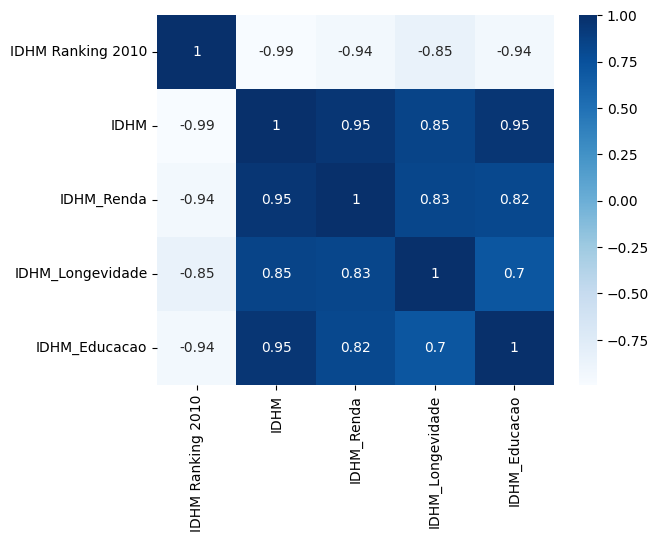

In [ ]:
sns.heatmap(idh.corr(), cmap='Blues', annot=True)

> # Em relação às correlações entre indicadores de IDH :
>
>> Os índices de IDHM são inversamente proporcionais ao IDHM Ranking 2010, ou seja, quanto mais alto o IDHM, mais próximo à
>>
>> posição #1 ele estará no Ranking. Com isso, sua correlação em relação ao IDHM é quase que totalmente negativo (-0.99)
>
>>
>> Podemos observar também que os indicadores de IDHM de **Renda, Educação e Longevidade** têm "pesos" diferentes na composição do IDHM:
>>
>> Enquanto os dois primeiros parecem ter uma correlação de **-0.94**, o de longevidade apresenta um valor um pouco abaixo: **0,85**.
>>
>> Desta forma, parece ter um peso menor na composição do IDHM Geral.
>
>> Apesar disto, tirando a coluna que espera-se que seja inversamente proporcional, vemos que todos os índices de IDHM tem uma correlação
>>
>> forte entre si, ou seja, a nota do IDHM é, como se espera, uma composição de diversos fatores, programas e melhorias implementadas pelas cidades,
>>
>> não sendo apenas fruto de um setor ou outro muito avançado. Todos os setores (educação, distribuição de renda, saúde - longevidade)
>>
>> têm de estar alinhados e caminhando na direção do progresso. Não basta apenas um setor superdesenvolvido para que a cidade tenha uma boa classificação no IDH.
>
>> A Longevidade apresenta as menores correlações com outras colunas, e como observado no primeiro ponto, é o que menos influencia na composição do IDHM.



_____